In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.io as pio
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel, RFECV
import json
import joblib
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score,confusion_matrix,ConfusionMatrixDisplay


In [7]:
data=pd.read_csv("Customer data.csv")
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,Kenya,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Uganda,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,Kenya,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,Kenya,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Uganda,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,Kenya,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,Kenya,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,Kenya,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Tanzania,Male,42,3,75075.31,2,1,0,92888.52,1


In [8]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,Kenya,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Uganda,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,Kenya,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,Kenya,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Uganda,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,Kenya,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Uganda,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,Kenya,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,Kenya,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Uganda,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Kenya,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,Kenya,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,Kenya,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Tanzania,Male,42,3,75075.31,2,1,0,92888.52,1


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x800 with 0 Axes>

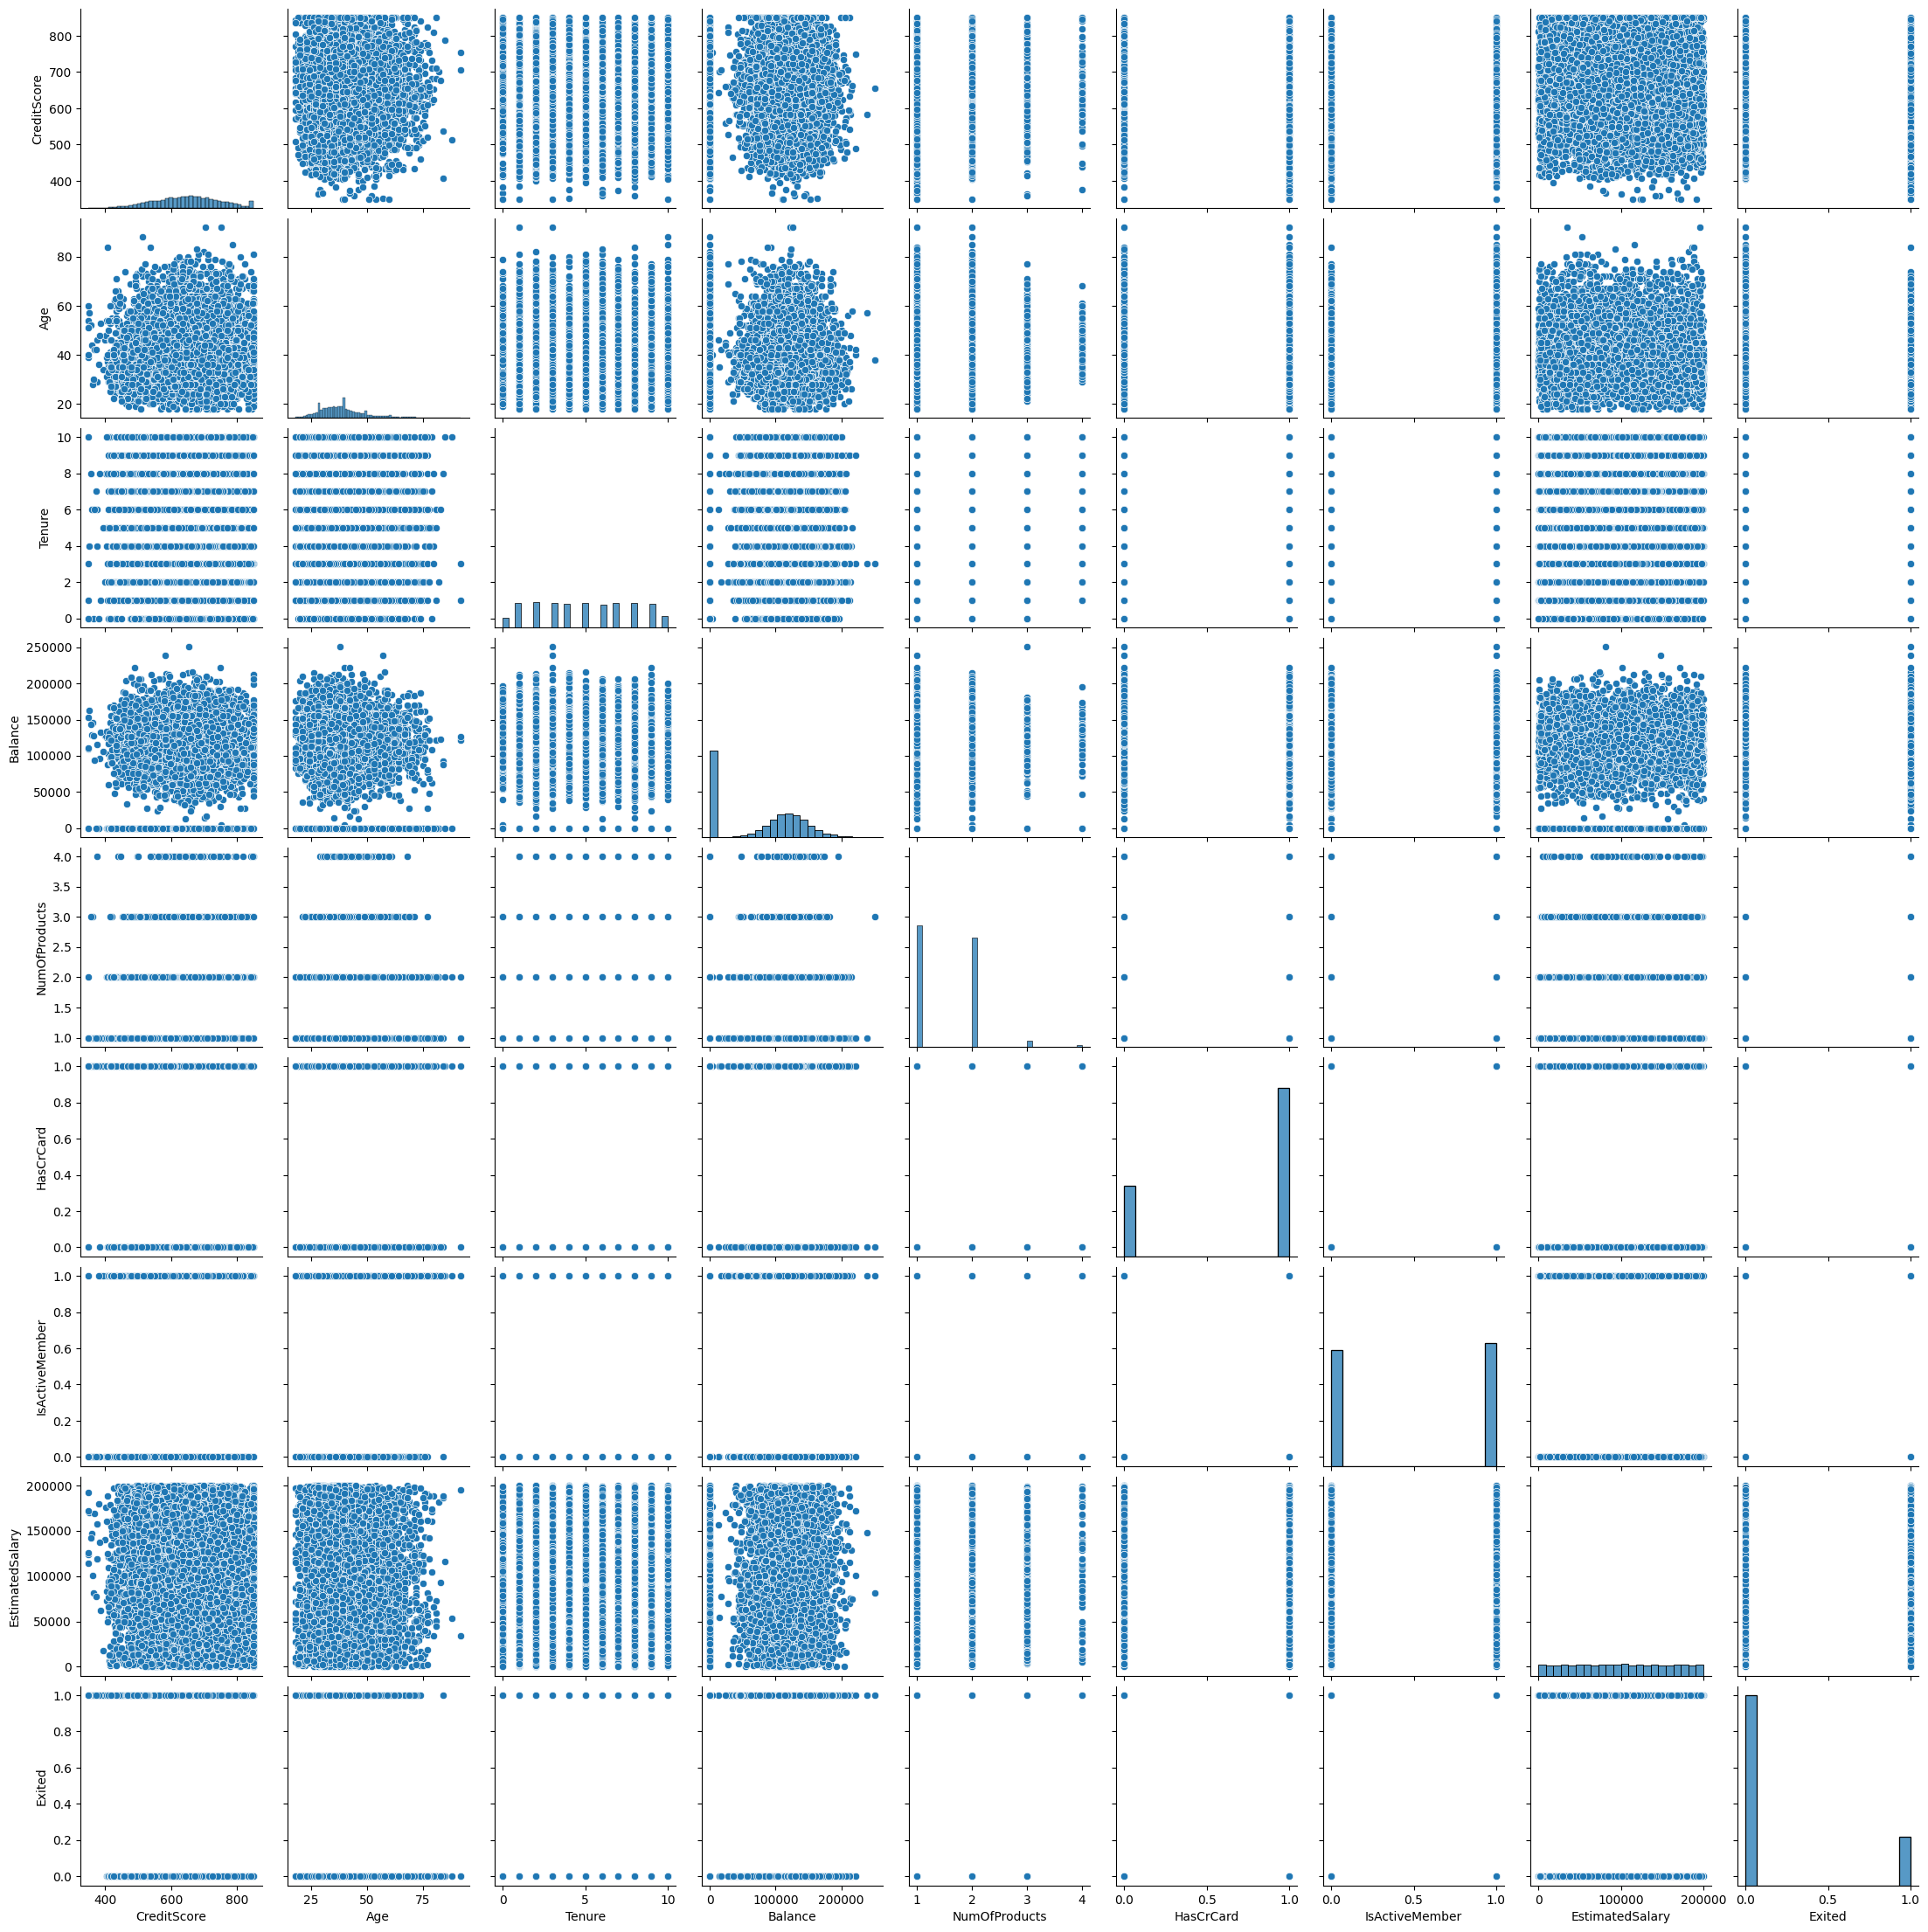

In [10]:
plt.figure(figsize=(10,8))
sns.pairplot(data)

plt.savefig("Pairplot.png")

In [11]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,Kenya,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Uganda,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,Kenya,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,Kenya,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Uganda,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Kenya,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,Kenya,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,Kenya,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Tanzania,Male,42,3,75075.31,2,1,0,92888.52,1


In [12]:
gender_dist=data["Gender"].value_counts()
gender_dist

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [13]:
fig=px.bar(gender_dist,x=gender_dist.index,y=gender_dist.values,title="Active members based on gender.")
fig.update_layout(width=1000,height=800)
fig.write_html("Active customers based on gender.html")

fig.show()

In [14]:
geo_active=data["Geography"].value_counts()
geo_active

Geography
Kenya       5014
Tanzania    2509
Uganda      2477
Name: count, dtype: int64

In [15]:
fig=px.bar(geo_active,x=geo_active.index,y=geo_active.values,title="Active members based on location.")
fig.update_layout(width=1000,height=800)

fig.write_html("Active members based on location.html")

In [16]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,Kenya,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Uganda,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,Kenya,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,Kenya,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Uganda,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Kenya,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,Kenya,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,Kenya,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Tanzania,Male,42,3,75075.31,2,1,0,92888.52,1


In [17]:
products=data["NumOfProducts"].value_counts()
products

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [18]:
fig=px.bar(products,x=products.index,y=products.values,title="Product number by active customers.")
fig.update_layout(width=1000,height=800)
fig.write_html("Number of products used.html")

fig.show()

In [19]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,Kenya,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Uganda,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,Kenya,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,Kenya,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Uganda,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Kenya,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,Kenya,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,Kenya,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Tanzania,Male,42,3,75075.31,2,1,0,92888.52,1


In [20]:
has_card=data["HasCrCard"].value_counts()
has_card

HasCrCard
1    7055
0    2945
Name: count, dtype: int64

In [21]:
fig=px.bar(has_card,x=has_card.index,y=has_card.values,title="Customers without credit cards vs with credit cards.")
fig.update_layout(width=1000,height=800)
fig.write_html("Credit cards vs no credit cards.html")

fig.show()

In [22]:
active=data["IsActiveMember"].value_counts()

In [23]:
fig=px.bar(active,x=active.index,y=active.values,title="Non active vs active customers.")
fig.update_layout(width=1000,height=800)

fig.write_html("Non active vs active.html")
fig.show()

In [24]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,Kenya,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Uganda,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,Kenya,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,Kenya,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Uganda,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Kenya,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,Kenya,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,Kenya,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Tanzania,Male,42,3,75075.31,2,1,0,92888.52,1


In [25]:
exit=data["Exited"].value_counts()
exit

Exited
0    7963
1    2037
Name: count, dtype: int64

In [26]:
fig=px.bar(exit,x=exit.index,y=exit.values,title="Not exited vs exited.")
fig.update_layout(width=1000,height=800)

fig.write_html("Retained vs churned.html")
fig.show()

In [27]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,Kenya,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Uganda,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,Kenya,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,Kenya,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Uganda,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Kenya,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,Kenya,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,Kenya,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Tanzania,Male,42,3,75075.31,2,1,0,92888.52,1


In [28]:
fig=px.box(data,x="Exited",y="Age",color="Exited")
fig.update_layout(width=1000,height=800)

fig.write_html("Age outlier.html")

fig.show()

In [29]:
Q1=data["Age"].quantile(0.25)
Q3=data["Age"].quantile(0.75)

IQR=Q3-Q1

lower_bound= Q1-1.5 * IQR
upper_bound= Q3 + 1.5 *IQR


data=data[(data["Age"] >= lower_bound) & (data["Age"]<=upper_bound)]


In [30]:
fig=px.box(data,x="Exited",y="Age",color="Exited")
fig.update_layout(width=1000,height=800)

fig.write_html("Cleaned age boxplot.html")
fig.show()

# Removed outliers

In [31]:

fig=px.box(data,x="Exited",y="EstimatedSalary",color="Exited")
fig.update_layout(width=1000,height=800)

fig.write_html("Salary boxplot.html")
fig.show()

In [32]:
fig=px.box(data,x="Exited",y="Balance",color="Exited")
fig.update_layout(width=1000,height=800)


In [33]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,Kenya,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Uganda,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,Kenya,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,Kenya,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Uganda,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Kenya,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,Kenya,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,Kenya,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Tanzania,Male,42,3,75075.31,2,1,0,92888.52,1


In [34]:
data["Geography"]=data["Geography"].map({"Kenya":0,"Tanzania":1,"Uganda":2})
data["Gender"]=data["Gender"].map({"Male":0,"Female":1})


C:\Users\DELL\AppData\Local\Temp\ipykernel_5160\1765747074.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_5160\1765747074.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



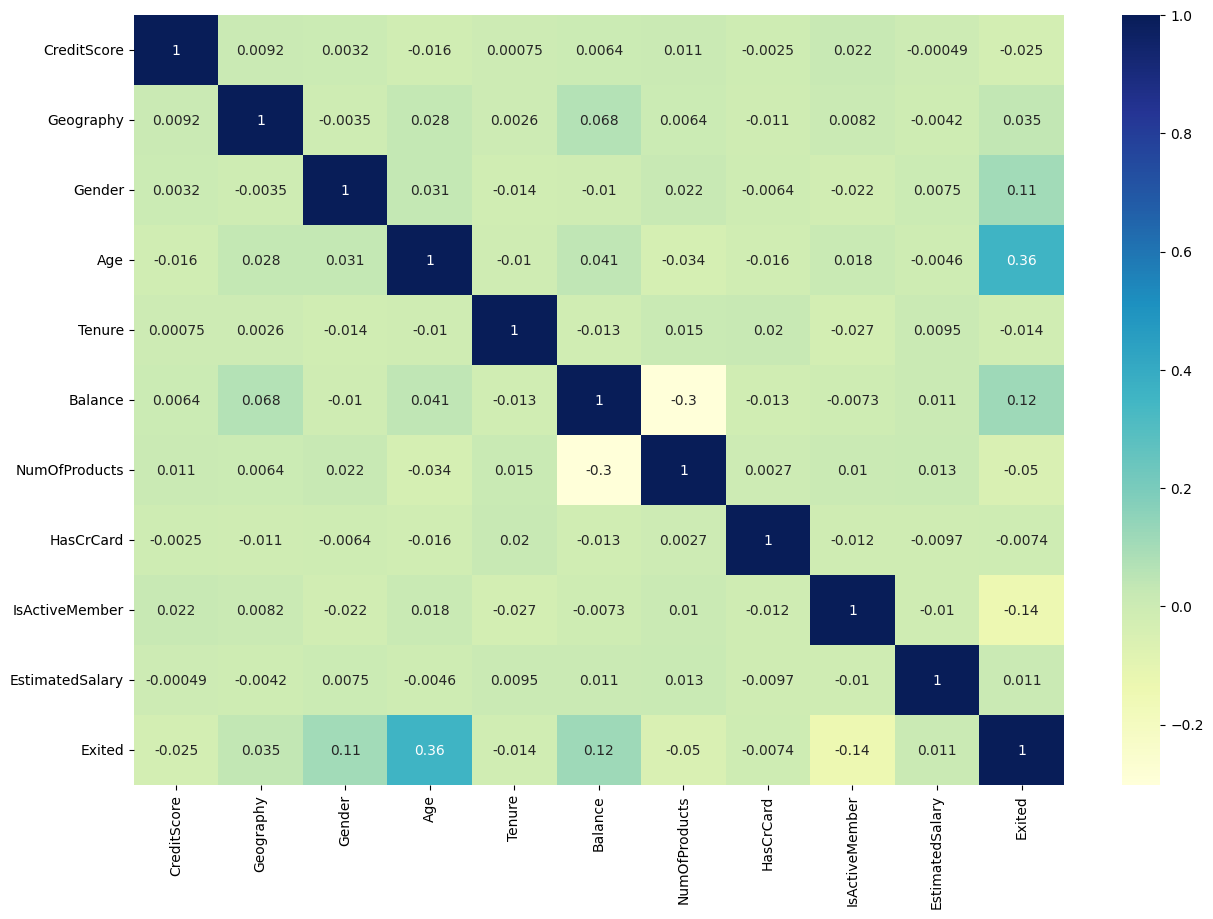

In [35]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,cmap="YlGnBu")
plt.savefig("Correlation matrix between input features")

plt.show()

In [36]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,2,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,2,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,0,39,5,0.00,2,1,0,96270.64,0
9996,516,0,0,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,1,36,7,0.00,1,0,1,42085.58,1
9998,772,1,0,42,3,75075.31,2,1,0,92888.52,1


In [37]:
x=data.drop(["Exited"],axis=1)
y=data["Exited"]

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

scaler=StandardScaler()

x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)


Accuracy: 0.8185588387765682
F1 score: 0.37943262411347517
Precision: 0.26354679802955666
Recall: 0.6772151898734177
[0 1]


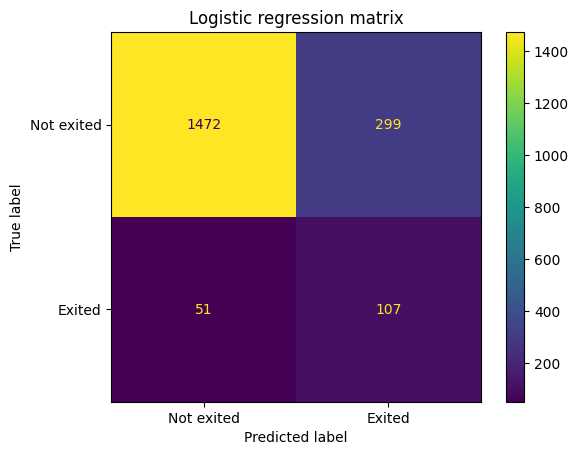

In [39]:
lr=LogisticRegression()

lr.fit(x_train_scaled,y_train)
y_pred=lr.predict(x_test_scaled)

acc=accuracy_score(y_pred,y_test)
f1=f1_score(y_pred,y_test)
precision=precision_score(y_pred,y_test)
recall=recall_score(y_pred,y_test)

print("Accuracy:",acc)
print("F1 score:",f1)
print("Precision:",precision)
print("Recall:",recall)

cm=confusion_matrix(y_pred,y_test,labels=lr.classes_)
print(lr.classes_)
cm_disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Not exited","Exited"])
cm_disp.plot()

plt.title("Logistic regression matrix")
plt.savefig("Logistic regression confusion matrix")

plt.show()

# Used Lr. classes to evaluate how to display the matrix([0,1])


Accuracy: 0.8418869880767237
F1 score: 0.46771378708551475
Precision: 0.33004926108374383
Recall: 0.8023952095808383


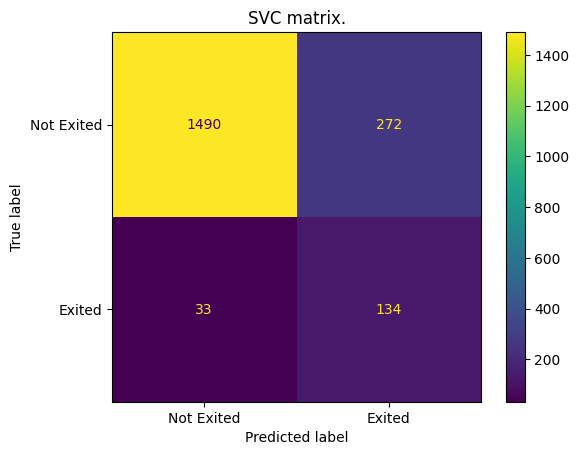

In [40]:
svc=SVC(kernel="rbf",C=0.5)

svc.fit(x_train_scaled,y_train)
y_pred=svc.predict(x_test_scaled)

acc=accuracy_score(y_pred,y_test)
f1=f1_score(y_pred,y_test)
precision=precision_score(y_pred,y_test)
recall=recall_score(y_pred,y_test)

print("Accuracy:",acc)
print("F1 score:",f1)
print("Precision:",precision)
print("Recall:",recall)

cm=confusion_matrix(y_pred,y_test,labels=svc.classes_)
cm_disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Not Exited","Exited"])
cm_disp.plot()

plt.title("SVC matrix.")
plt.savefig("SVC confusion matrix.")

plt.show()



In [41]:
# dtree=DecisionTreeClassifier(max_depth=3,min_samples_leaf=2,min_samples_split=3)

# dtree.fit(x_train_scaled,y_train)
# y_pred=dtree.predict(x_test_scaled)
# acc=accuracy_score(y_pred,y_test)
# f1=f1_score(y_pred,y_test)
# precision=precision_score(y_pred,y_test)
# recall=recall_score(y_pred,y_test)

# print("Accuracy:",acc)
# print("F1 score:",f1)
# print("Precision:",precision)
# print("Recall:",recall)

# cm=confusion_matrix(y_pred,y_test,labels=dtree.classes_)
# cm_disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Not Exited","Exited"])
# cm_disp.plot()

# plt.title("Dtree matrix.")
# plt.savefig("Dtree confusion matrix.")
# plt.show()



Accuracy: 0.8252980819077242
F1 score: 0.3506743737957611
Precision: 0.22413793103448276
Recall: 0.8053097345132744


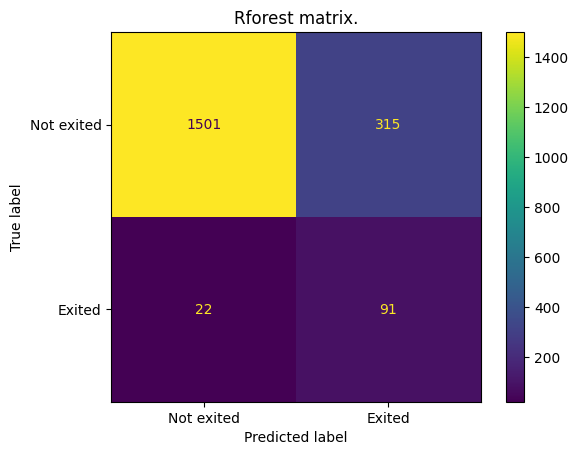

In [42]:
rforest=RandomForestClassifier(n_estimators=5,max_depth=3,min_samples_split=2,min_samples_leaf=3,random_state=42)

rforest.fit(x_train_scaled,y_train)
y_pred=rforest.predict(x_test_scaled)

acc=accuracy_score(y_pred,y_test)
f1=f1_score(y_pred,y_test)
precision=precision_score(y_pred,y_test)
recall=recall_score(y_pred,y_test)

print("Accuracy:",acc)
print("F1 score:",f1)
print("Precision:",precision)
print("Recall:",recall)

cm=confusion_matrix(y_pred,y_test,labels=rforest.classes_)
cm_disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Not exited","Exited"])
cm_disp.plot()

plt.title("Rforest matrix.")
plt.savefig("Rforest confusion matrix.")
plt.show()


In [43]:
param_dist={
    "n_estimators":[2,8,7],
    "min_samples_split":[2,4,5],
    "min_samples_leaf":[3,4,5]
}

estimator= RandomForestClassifier(random_state=42)
grid_search= GridSearchCV(estimator=estimator,param_grid=param_dist,cv=5,scoring="neg_mean_squared_error")

grid_search.fit(x_train_scaled,y_train)

best_params=grid_search.best_params_
best_estimator=grid_search.best_estimator_
best_score=grid_search.best_score_

In [44]:
best_params

{'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 8}

In [45]:
best_estimator


RandomForestClassifier(min_samples_leaf=4, n_estimators=8, random_state=42)

In [46]:
best_score

-0.1425054196475779

Accuracy: 0.8418869880767237
F1 score: 0.46771378708551475
Precision: 0.33004926108374383
Recall: 0.8023952095808383
[0 1]


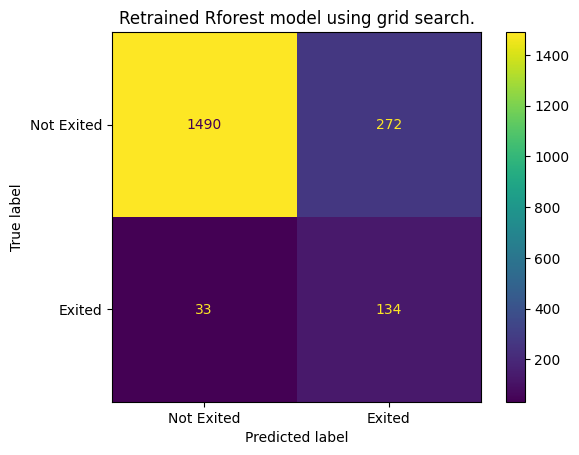

In [47]:
rforest=RandomForestClassifier(min_samples_leaf=4,n_estimators=8,min_samples_split=2,random_state=42)

rforest.fit(x_train_scaled,y_train)
y_pred=svc.predict(x_test_scaled)

acc=accuracy_score(y_pred,y_test)
f1=f1_score(y_pred,y_test)
precision=precision_score(y_pred,y_test)
recall=recall_score(y_pred,y_test)

print("Accuracy:",acc)
print("F1 score:",f1)
print("Precision:",precision)
print("Recall:",recall)

cm=confusion_matrix(y_pred,y_test,labels=rforest.classes_)

print(rforest.classes_)
cm_disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Not Exited","Exited"])
cm_disp.plot()

plt.title("Retrained Rforest model using grid search.")
plt.savefig("Retrained Rforest confusion matrix")



In [48]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

rforest = RandomForestClassifier(min_samples_leaf=4,n_estimators=8,min_samples_split=2,random_state=42)

feature_selector = SelectFromModel(rforest)

feature_selector.fit(x_train_scaled, y_train)

x_train_selected = feature_selector.transform(x_train_scaled)

selector = RFECV(rforest, step=1, cv=5, scoring='accuracy')

selector.fit(x_train_selected, y_train)

selected_features = x_train.columns[feature_selector.get_support()]
feature_ranks = selector.ranking_

print(f"Selected features: {selected_features}")
print(f"Feature ranks: {feature_ranks}")





Selected features: Index(['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary'], dtype='object')
Feature ranks: [1 1 1 1 1]


In [49]:

selected_features_list = selected_features.tolist()

x_train_selected = x_train[selected_features_list]
x_test_selected = x_test[selected_features_list]

In [50]:
best_model=rforest.fit(x_train_selected, y_train)


y_pred = best_model.predict(x_test_selected)


from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy with selected features: {test_accuracy}")

Test accuracy with selected features: 0.8299637117677553


In [51]:
y_pred = best_model.predict(x_test_selected)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)


print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")

Accuracy: 0.8300
Precision: 0.6573
Recall: 0.4015
F1-score: 0.4985
AUC-ROC: 0.6728


Text(0.5, 1.0, 'Confusion matrix using selected features')

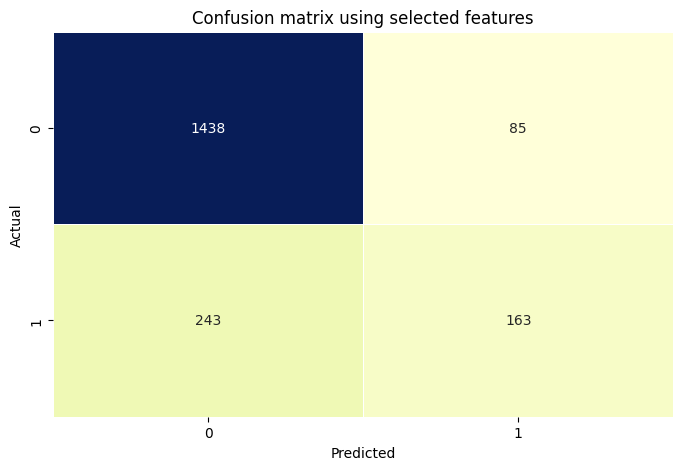

In [55]:

cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu", cbar=False, linewidths=0.5)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion matrix using selected features")





In [53]:
selected_features_list = selected_features.tolist()

with open("selected_features.json", "w") as f:
    json.dump(selected_features_list, f)

In [54]:
joblib.dump(best_model, "best_model1.pkl")

['best_model1.pkl']